# Trying with Bolt 1

Machine learning approach but this time concentrating on bolt 1



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
df=pd.read_parquet('input_dataset-2.parquet')

# Make operation a bool
df['mode']=df['mode']=='operation'

# Select subset
#df=df.sample(100000)

# Remove nans
df = df.dropna()

print(df.shape)

df.head()

(943931, 22)


,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,,,,,,
1970-12-29 10:59:57,311.093257,4.949223,94.206187,150.827828,5305.873472,108.033198,True,2.458908,1609.140569,1488.522739,...,1637.373796,1678.107726,177.730733,163.324591,146.500052,226.013417,298.403158,161.914265,0.154292,0.517703
1970-12-29 10:59:58,311.103996,5.051777,94.206457,150.774664,5305.690188,108.033197,True,2.458729,1609.127944,1488.494639,...,1637.353554,1678.100380,177.736039,163.323607,146.498639,226.013106,298.403272,161.912569,0.155838,0.530280
1970-12-29 10:59:59,311.114735,5.154330,94.206726,150.559452,5305.466701,108.033196,True,2.459334,1609.138758,1488.493451,...,1637.360655,1678.106863,177.735616,163.328645,146.494156,226.013736,298.397846,161.912716,0.169547,0.540085
1970-12-29 11:00:00,311.125475,5.256883,94.206995,150.344239,5305.243213,108.033195,True,2.459329,1609.121478,1488.488279,...,1637.365372,1678.078172,177.738552,163.331201,146.491341,226.017247,298.400658,161.912572,0.173561,0.526994
1970-12-29 11:00:01,311.136214,5.359436,94.207264,150.129027,5305.019725,108.033194,True,2.459337,1609.113766,1488.488892,...,1637.354723,1678.067193,177.741082,163.329769,146.498284,226.013418,298.402517,161.915946,0.166955,0.524617


In [2]:
# Split into input and target variables
X = df[['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening',
       'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing',
       'Turbine_Rotational Speed', 'mode']]

y = df.filter(regex='Bolt_1_Tensile')

# Split data set into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)



## Kitchen Sink

Brute force with Linear Regression and Random Forest

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error


# Scale
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_train)

# Train
model = LinearRegression()
model.fit(X_scale, y_train)

# Perform a prediction
y_pred = model.predict(scaler.transform(X_test))

# Check the score
mean_absolute_percentage_error(y_test,y_pred)


0.002396159978661822

In [4]:
# Reshape for plotting
y_test['Bolt_1_Tensile'].values


array([1609.14204285, 1618.09696878, 1608.95950214, ..., 1627.94082815,
       1619.0096607 , 1617.62832736])

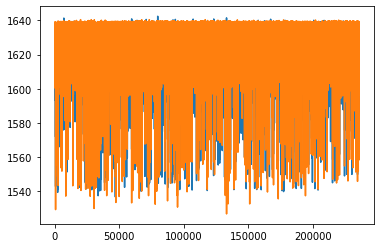

In [5]:
plt.plot(y_pred.reshape(y_test.shape[0]))
plt.plot(y_test['Bolt_1_Tensile'].values)

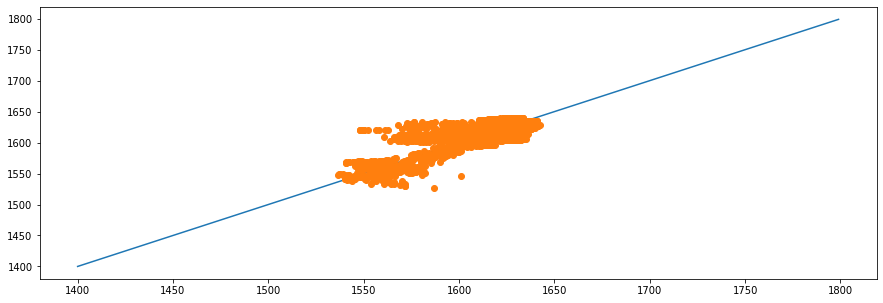

In [6]:
y_1 = y_pred.reshape(y_test.shape[0])
y_2 = y_test['Bolt_1_Tensile'].values

plt.figure(figsize=(15,5))
plt.plot(range(1400,1800),range(1400,1800))
plt.plot(y_1,y_2,'o')

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Scale
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_train)

# Train
model = RandomForestRegressor(n_estimators=10)
model.fit(X_scale, y_train)

# Perform a prediction
y_pred = model.predict(scaler.transform(X_test))

# Check the score
mean_absolute_percentage_error(y_test,y_pred)

/tmp/ipykernel_56765/2519961280.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_scale, y_train)


3.9139265496458917e-05

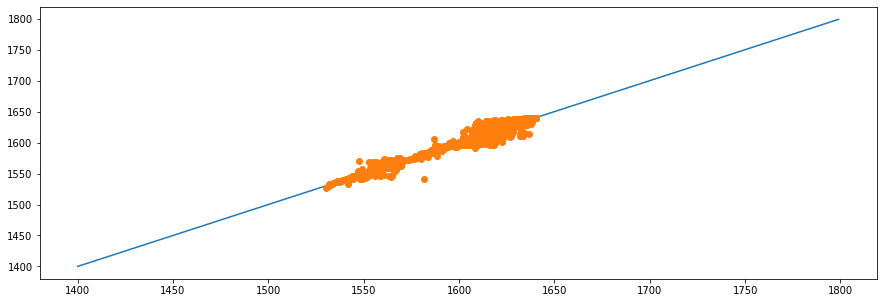

In [8]:
y_1 = y_pred.reshape(y_test.shape[0])
y_2 = y_test['Bolt_1_Tensile'].values

plt.figure(figsize=(15,5))
plt.plot(range(1400,1800),range(1400,1800))
plt.plot(y_1,y_2,'o')

## Try with PCA to increase performance


In [10]:
from sklearn.decomposition import PCA

#Scale
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_train)

# Fit PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scale)


# Train
model = LinearRegression()
model.fit(X_pca, y_train)

# Perform a prediction
X_test_transform = pca.transform(scaler.transform(X_test))
y_pred = model.predict(X_test_transform)


# Check the score
mean_absolute_percentage_error(y_test,y_pred)

0.004192010158090481

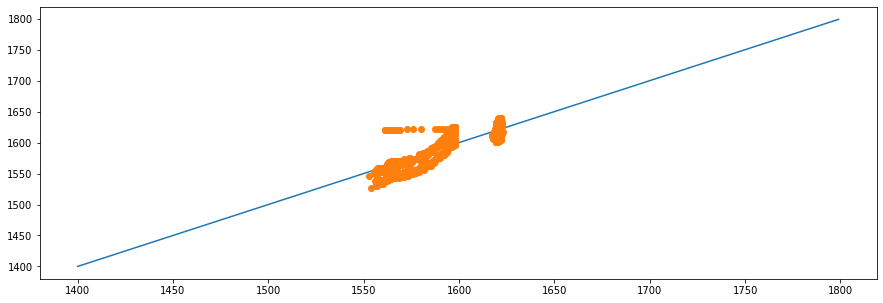

In [11]:
y_1 = y_pred.reshape(y_test.shape[0])
y_2 = y_test['Bolt_1_Tensile'].values

plt.figure(figsize=(15,5))
plt.plot(range(1400,1800),range(1400,1800))
plt.plot(y_1,y_2,'o')